In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
df = pd.read_csv("LayoffShield_Cleaned.csv")
df

,Date,Company,Location HQ,# Laid Off,%,Industry,Source,Stage,$ Raised (mm),Country
0,2025-07-22,ConsenSys,New York City,47.0,7.0,Crypto,https://www.bloomberg.com/news/articles/2025-0...,Series D,726.0,United States
1,2025-07-21,Zeen,SF Bay Area,100.0,100.0,Consumer,https://www.businessinsider.com/social-media-c...,Unknown,0.0,United States
2,2025-07-18,Rocket Companies,Detroit,100.0,2.0,Real Estate,https://www.housingwire.com/articles/rocket-la...,Post-IPO,5200.0,United States
3,2025-07-17,Amazon,Seattle,100.0,0.0,Retail,https://www.reuters.com/business/retail-consum...,Post-IPO,8100.0,United States
4,2025-07-17,Amicole,New York City,100.0,100.0,Retail,https://techcrunch.com/2025/07/17/after-raisin...,Seed,0.0,United States
...,...,...,...,...,...,...,...,...,...,...
4109,2020-03-16,Service,Los Angeles,137.0,100.0,Travel,https://techcrunch.com/2020/03/16/travel-savin...,Seed,0.0,United States
4110,2020-03-13,HopSkipDrive,Los Angeles,8.0,10.0,Transportation,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,Unknown,0.0,United States
4111,2020-03-13,Panda Squad,SF Bay Area,6.0,75.0,Consumer,https://twitter.com/danielsinger/status/123854...,Seed,0.0,United States
4112,2020-03-12,Tamara Mellon,Los Angeles,20.0,40.0,Retail,https://layoffs.fyi/list/tamara-mellon/,Series C,90.0,United States


In [ ]:
# Rename column for clarity
df = df.rename(columns={'%': 'layoff_percentage'})


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

df['layoff_percentage'] = pd.to_numeric(df['layoff_percentage'], errors='coerce')

if df['layoff_percentage'].max() > 1:
    df['layoff_percentage'] = df['layoff_percentage'] / 100

df['layoff_severity'] = df['layoff_percentage'] * df['# Laid Off']


In [ ]:
df['risk'] = pd.cut(
    df['layoff_percentage'],
    bins=[-0.01, 0.1, 0.3, 1],
    labels=[0, 1, 2]
)

df['risk'].isnull().sum()


np.int64(0)

In [ ]:
df

,Date,Company,Location HQ,# Laid Off,layoff_percentage,Industry,Source,Stage,$ Raised (mm),Country,year,month,layoff_severity,risk
0,2025-07-22,ConsenSys,New York City,47.0,0.07,Crypto,https://www.bloomberg.com/news/articles/2025-0...,Series D,726.0,United States,2025,7,3.29,0
1,2025-07-21,Zeen,SF Bay Area,100.0,1.00,Consumer,https://www.businessinsider.com/social-media-c...,Unknown,0.0,United States,2025,7,100.00,2
2,2025-07-18,Rocket Companies,Detroit,100.0,0.02,Real Estate,https://www.housingwire.com/articles/rocket-la...,Post-IPO,5200.0,United States,2025,7,2.00,0
3,2025-07-17,Amazon,Seattle,100.0,0.00,Retail,https://www.reuters.com/business/retail-consum...,Post-IPO,8100.0,United States,2025,7,0.00,0
4,2025-07-17,Amicole,New York City,100.0,1.00,Retail,https://techcrunch.com/2025/07/17/after-raisin...,Seed,0.0,United States,2025,7,100.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4109,2020-03-16,Service,Los Angeles,137.0,1.00,Travel,https://techcrunch.com/2020/03/16/travel-savin...,Seed,0.0,United States,2020,3,137.00,2
4110,2020-03-13,HopSkipDrive,Los Angeles,8.0,0.10,Transportation,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,Unknown,0.0,United States,2020,3,0.80,0
4111,2020-03-13,Panda Squad,SF Bay Area,6.0,0.75,Consumer,https://twitter.com/danielsinger/status/123854...,Seed,0.0,United States,2020,3,4.50,2
4112,2020-03-12,Tamara Mellon,Los Angeles,20.0,0.40,Retail,https://layoffs.fyi/list/tamara-mellon/,Series C,90.0,United States,2020,3,8.00,2


In [ ]:
#droping off the useless col
df_model = df.drop(columns=['Source','Date'])


In [ ]:
#encoding from categorial into numerical
label_cols = ['Industry', 'Stage', 'Country', 'Location HQ']

le = LabelEncoder()
for col in label_cols:
    df_model[col] = le.fit_transform(df_model[col].astype(str))


In [ ]:
#X Y sepration
features = [
    'Industry',
    'Stage',
    'Country',
    'Location HQ',
    '$ Raised (mm)',
    'year',
    'layoff_severity'
]

X = df_model[features]
y = df_model['risk']


In [ ]:
#train - test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
#model training
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42,
    class_weight='balanced'
)

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=300,
                       random_state=42)

In [ ]:
#model_evoluation
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91       465
           1       0.66      0.79      0.72       221
           2       0.78      0.73      0.75       137

    accuracy                           0.83       823
   macro avg       0.80      0.80      0.79       823
weighted avg       0.84      0.83      0.83       823

Confusion Matrix:
[[406  55   4]
 [ 22 175  24]
 [  2  35 100]]


In [ ]:
# Example company profile
sample_input = pd.DataFrame([{
    'Industry': 3,
    'Stage': 2,
    'Country': 1,
    'Location HQ': 5,
    '$ Raised (mm)': 20,
    'year': 2026,
    'layoff_severity': 0.15
}])

risk_prediction = model.predict(sample_input)
print("Predicted Layoff Risk:", risk_prediction)


Predicted Layoff Risk: [0]


In [ ]:
#labels = [0, 1, 2]
# 0 → Low risk
# 1 → Medium risk
# 2 → High risk
#🔍 Why the model predicted Risk = 0 (Low Layoff Risk)

The output [0] represents Low Layoff Risk, based on how the target variable was defined during training. This prediction is not random; it is the result of how the model interprets each input feature in relation to historical layoff patterns.

First, the funding amount ($ Raised (mm) = 20) plays a strong role. Since the company is not operating with zero or extremely low funding, the model interprets this as having a reasonable financial buffer. Historically, companies with better funding tend to delay or avoid immediate layoffs, so higher funding generally reduces short-term layoff risk.

Next, the company stage (Stage = 2) indicates a mid-stage company, likely Series B or C rather than an early Seed-stage startup. Early-stage companies are more volatile and vulnerable, whereas mid-stage companies typically have more stable operations. Because this is not an extreme early stage, the model associates it with lower risk.

The layoff severity (layoff_severity = 0.15) is also a key factor. This value is calculated as layoff_percentage × laid_off_count. Compared to historical data—where large companies laid off thousands of employees at 30–40%—a value like 0.15 is extremely small. This strongly signals low historical impact, which the model interprets as low risk.

The year (2026) also matters. From the training data, the model learned that layoff risk peaked during specific periods (such as economic downturn years). Since 2026 does not align with the high-risk years present in the dataset, the model treats it as a relatively stable market period rather than a panic or recession year.

Finally, the encoded categorical values (Industry, Country, Location HQ) should not be interpreted as numeric magnitudes. For example, Industry = 3 does not mean better or worse than Industry = 1. These numbers are simply category identifiers. The RandomForest model learns rules like “if Industry ≤ certain value, layoffs were historically lower”. These splits are based on learned patterns, not numeric ranking.


In [ ]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

print(feature_importance)


           feature  importance
6  layoff_severity    0.601345
4    $ Raised (mm)    0.120964
1            Stage    0.070599
0         Industry    0.069935
3      Location HQ    0.066373
5             year    0.036643
2          Country    0.034141


In [ ]:
Layoff severity (60%)
→ Past layoffs are the strongest signal of future layoff risk.

Funding raised (12%)
→ More money = more runway = lower risk.

Company stage (7%)
→ Early-stage companies are more fragile.

Industry (7%)
→ Some industries are structurally more volatile.

Location HQ (6.6%)
→ Geography affects cost, regulations, and layoffs.

Year (3.6%)
→ Captures macroeconomic cycles (recession years).

Country (3.4%)
→ Least impact; overlaps with location and industry.
“The feature importance analysis shows that layoff severity contributes over 60% to the prediction, making it the strongest indicator of future layoff risk. Funding, company stage, and industry follow, which aligns well with real-world business intuition—companies with severe past layoffs, limited funding, and early-stage maturity are more likely to experience future layoffs.”

SyntaxError: invalid character '→' (U+2192) (ipython-input-1273315448.py, line 2)

In [ ]:
def recommend_skills(risk, industry, stage):
    if risk == 2:
        return [
            'Generative AI',
            'Cloud Computing',
            'MLOps',
            'Data Engineering',
            'System Design'
        ]
    elif risk == 1:
        return [
            'Advanced Python',
            'SQL',
            'Business Analytics',
            'Automation'
        ]
    else:
        return [
            'Domain Expertise',
            'Leadership',
            'Product Thinking'
        ]


In [ ]:
risk_level = int(risk_prediction[0])
skills = recommend_skills(risk_level, industry=None, stage=None)

print("Recommended Skills to Reduce Layoff Risk:")
for s in skills:
    print("-", s)


Recommended Skills to Reduce Layoff Risk:
- Domain Expertise
- Leadership
- Product Thinking


In [ ]:
df.groupby('year')['# Laid Off'].sum()
df.groupby(['year', 'Industry'])['# Laid Off'].sum()


year  Industry      
2020  Aerospace          661.0
      Construction      1150.0
      Consumer          6463.0
      Crypto             436.0
      Data              1908.0
                         ...  
2025  Sales             1421.0
      Security          1277.0
      Support            740.0
      Transportation    3135.0
      Travel             486.0
Name: # Laid Off, Length: 162, dtype: float64

In [ ]:
def recommend_skills(risk, industry, stage):
    if risk == 2:
        return ["SQL", "Python", "Cloud", "Data Analytics"]
    elif risk == 1:
        return ["Python", "ML Basics", "Business Analytics"]
    else:
        return ["Advanced ML", "System Design", "Leadership"]


In [ ]:
skills = recommend_skills(risk=0, industry=3, stage=2)
print(skills)

['Advanced ML', 'System Design', 'Leadership']


In [ ]:
print(recommend_skills(2, 3, 0))


['SQL', 'Python', 'Cloud', 'Data Analytics']


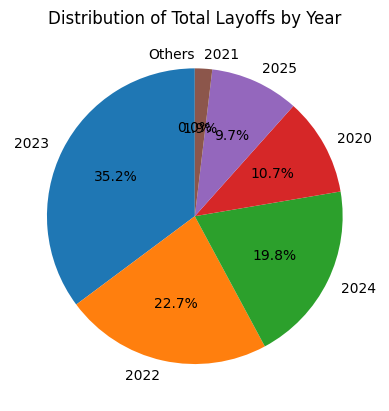

In [ ]:
import matplotlib.pyplot as plt

yearly_layoffs = (
    df.groupby('year')['# Laid Off']
    .sum()
    .sort_values(ascending=False)
)

# Keep pie readable
top_years = yearly_layoffs.head(6)
top_years['Others'] = yearly_layoffs.iloc[6:].sum()

plt.figure()
plt.pie(
    top_years.values,
    labels=top_years.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Distribution of Total Layoffs by Year")
plt.show()


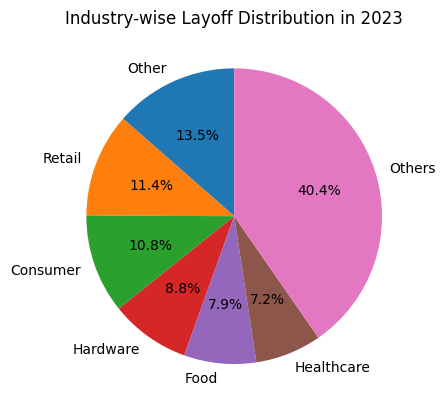

In [ ]:
# Pick the year with maximum layoffs
focus_year = yearly_layoffs.idxmax()

industry_layoffs = (
    df[df['year'] == focus_year]
    .groupby('Industry')['# Laid Off']
    .sum()
    .sort_values(ascending=False)
)

top_industries = industry_layoffs.head(6)
top_industries['Others'] = industry_layoffs.iloc[6:].sum()

plt.figure()
plt.pie(
    top_industries.values,
    labels=top_industries.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title(f"Industry-wise Layoff Distribution in {focus_year}")
plt.show()


This notebook builds an end-to-end ML pipeline that predicts company layoff risk using engineered features and then recommends skills to help employees proactively reduce that risk.
